# EDA (Exploratory Data Analysis)

This is basic notebook to a first overview of a dataset.

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import sys  
sys.path.append('../arguments/')  
from _arguments import *
sys.path.append('../scripts/tools')  
from handlers import reader

### read data

In [2]:
path = os.path.join(folder_data_raw,'load_iris.csv')
dfdata,dcol = reader(path,starget='target')
dcol

{'lc_cat': ['y'],
 'lc_float': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 'lc_int': [],
 'lx': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 'ly': ['y']}

In [3]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
y                    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## BASIC STATISTICS

In [4]:
## display tables with basic stastistics 
def dfdescribe(df:'dataframe'):
    """
    Display tables with basic stastistics for categorical and numeracila data.
    df -- df of data.
    """
    from IPython.display import display, HTML
    import pandas as pd

    # list of columns per type
    lcol_num = list(df.select_dtypes(include=['float64','int64']).columns.values)
    lcol_cat = list(df.select_dtypes(include=['object']).columns.values)
    
    # header
    display(HTML('<h1>BASIC STATISTICS:</h1>'))
    display(HTML(df.info()))
    ## basic statistics: numerical data
    display(HTML('<h2>Numerical Data</h2>'))
    display(HTML(pd.concat([df.describe().transpose(),
            pd.DataFrame(df.isnull().sum(),columns=['nnull']),
            pd.DataFrame(df.dtypes,columns=['dtypes'])],axis=1).dropna().to_html())) 
    ## basic statistics: categorical variables
    display(HTML('<h2>Categorical Data</h2>'))
    display(HTML(pd.concat([df.describe(include=['O', 'category']).transpose(),
            pd.DataFrame(df.isnull().sum(),columns=['nnull']),
            pd.DataFrame(df.dtypes,columns=['dtypes'])],axis=1).dropna().to_html()))    
    # frequencies
    for icol in lcol_cat:
        display(HTML('<h3>- Categorical Variable: "%s"</h3>'%icol))
        display(HTML(pd.concat([pd.DataFrame(df[icol].value_counts()).rename(columns={icol:'%s(%s)'%(icol,'num')}),  
                  pd.DataFrame(df[icol].value_counts()*100./float(len(df))).rename(columns={icol:'%s(%s)'%(icol,'%')})],axis=1).to_html()))
    ## basic statistics: categorical vs numerical variables
    if len(lcol_cat)>0 and len(lcol_num):
        display(HTML('<h2>Categorical vs Numerical Variables</h2>'))
        for scol_cat in lcol_cat:
            for scol_num in lcol_num:
                display(HTML('<h3>- [Cat.: "%s"] vs [Num.: "%s"]</h3>'%(scol_cat,scol_num)))
                display(HTML(df.groupby(scol_cat)[scol_num].describe().to_html()))  
    ## basic statistics: correlation matrix (between num. variables)
    display(HTML('<h2>Matrix Correlation (for Num. Variables)</h2>'))
    display(HTML(df.corr().to_html()))
    # return
    return None

In [5]:
dfdescribe(dfdata)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
y                    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<IPython.core.display.HTML object>

,count,mean,std,min,25%,50%,75%,max,nnull,dtypes
petal length (cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9,0,float64
petal width (cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5,0,float64
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,0,float64
sepal width (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4,0,float64


,count,unique,top,freq,nnull,dtypes
y,150,3,setosa,50,0,object


,y(num),y(%)
setosa,50,33.333333
versicolor,50,33.333333
virginica,50,33.333333


,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


## BOXPLOTS

In [16]:
## display boxplots
def dfboxplot(df:'dataframe')->dict:
    """
    Display boxplots for categorical and numeracila data.
    df -- df of data.
    return -- dictionary with possible outliers.
    """
    from IPython.display import display, HTML

    # list of columns per type
    lcol_num = list(df.select_dtypes(include=['float64','int64']).columns.values)
    lcol_cat = list(df.select_dtypes(include=['object']).columns.values)
    
    ## boxplot: numerical variables
    display(HTML('<h2>Boxplot: Numerical Data</h2>'))
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    _, bp = df[lcol_num].boxplot(rot=90,fontsize=12,grid=True,ax=ax,return_type='both')
    plt.show()
    # collect outlier
    doutliers = dict()
    loutliers = [flier.get_ydata() for flier in bp["fliers"]]
    for scol,outliers in zip(lcol_num,loutliers):
        if len(outliers)>0: 
            doutliers[scol] = outliers
            display(HTML('<b>Warning</b>: variable "%s" has %s possible outliers.'%(scol,len(outliers))))       
    ## boxplot: categorical vs numerical variables      
    display(HTML('<h2>Boxplot: Categorical vs Numerical Data</h2>'))
    for scol_cat in lcol_cat:
        display(HTML('<h3>- Cat. Variable: "%s"</h3>'%(scol_cat)))
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(figsize=(10,10))
        df.boxplot(rot=90,fontsize=12,grid=True,ax=ax,by=scol_cat)
        plt.show()
    # return 
    return doutliers

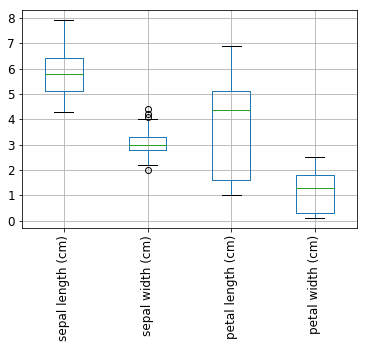

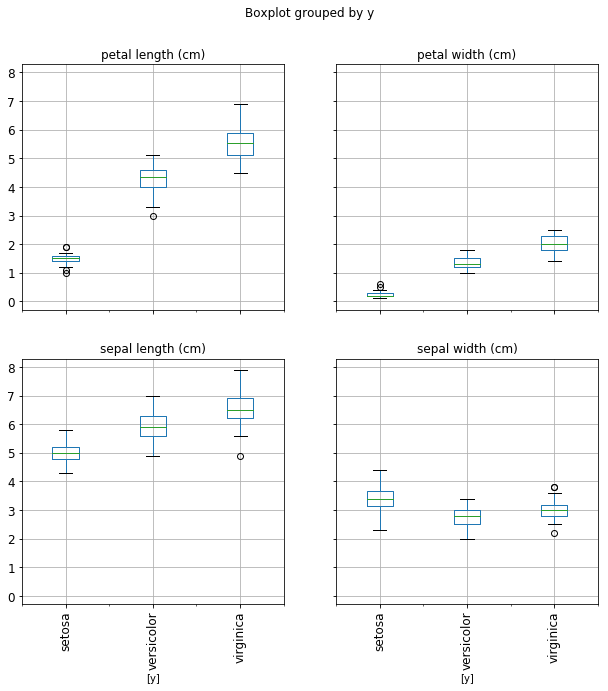

{'sepal width (cm)': array([2. , 4.4, 4.1, 4.2])}

In [17]:
dfboxplot(dfdata)

## HISTOGRAMS

In [139]:
## display histograms
def dfhist(df:'dataframe'):
    """
    Display histograms for categorical and numeracila data.
    df -- df of data.
    """
    from IPython.display import display, HTML

    # list of columns per type
    lcol_num = list(df.select_dtypes(include=['float64','int64']).columns.values)
    lcol_cat = list(df.select_dtypes(include=['object']).columns.values)
    
    ## histogram: numerical variables
    display(HTML('<h2>Histogram: Numerical Data</h2>'))
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10,8))
    #df[lcol_num].hist(grid=True,ax=ax)
    df[lcol_num].plot.density(legend=True,ax=ax,subplots=True)
    plt.show()
    ## pie chart: categorical variables
    display(HTML('<h2>Pie Chart: Categorical Data</h2>'))
    for scol_cat in lcol_cat:
        display(HTML('<h3>- Cat. Variable: "%s"</h3>'%(scol_cat)))
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(figsize=(6, 6))
        df[scol_cat].value_counts().plot.pie(autopct='%.2f', title='Count Labels(%)',fontsize=12)
        plt.show()
    ## histogram: categorical vs numerical variables      
    display(HTML('<h2>Histogram: Categorical vs Numerical Data</h2>'))
    for scol_cat in lcol_cat:
        for scol_num in lcol_num:
            display(HTML('<h3>- [Cat.: "%s"] vs [Num.: "%s"]</h3>'%(scol_cat,scol_num)))
            import matplotlib.pyplot as plt
            fig, ax = plt.subplots(figsize=(10,5))
            #df.groupby(scol_cat)[scol_num].plot(kind='hist',alpha=0.4,legend=True,ax=ax,density=True)
            df.groupby(scol_cat)[scol_num].plot.density(legend=True,ax=ax)
            plt.show()
    # return 
    return None

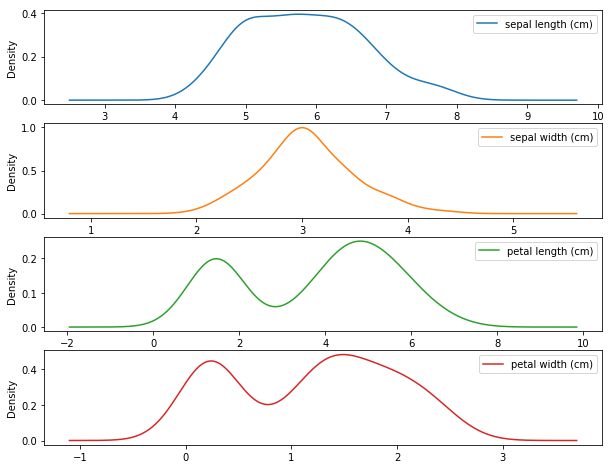

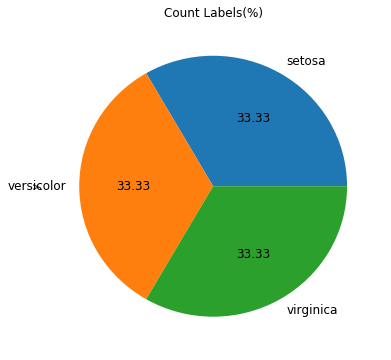

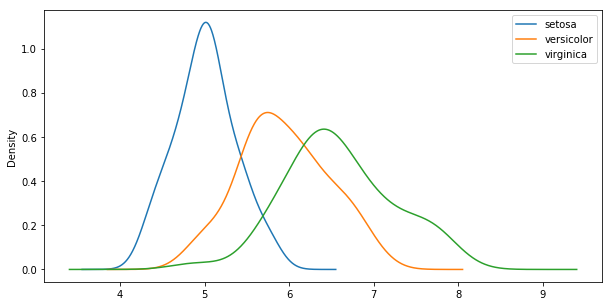

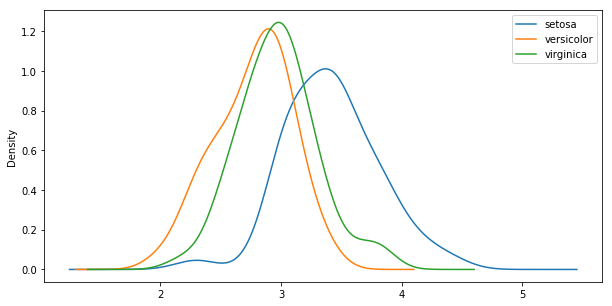

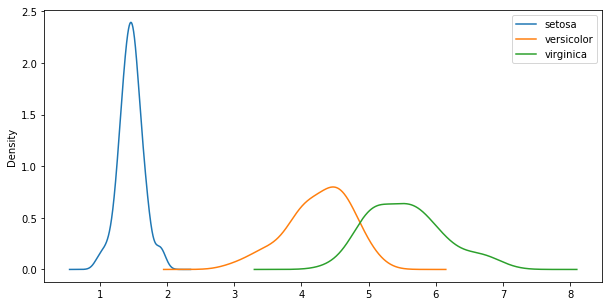

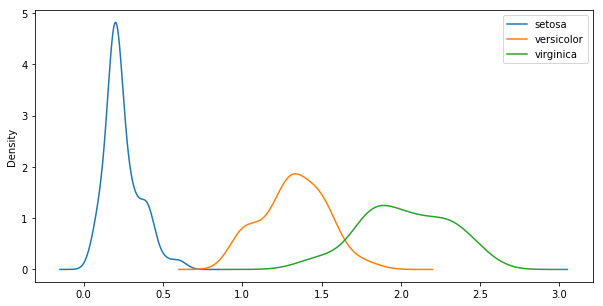

In [140]:
dfhist(dfdata)